# Regression

## Plan

### Use Case

Das Unternehmen, welches bisher vor allem als Marktplatz für Immobilien von Kunden agiert hat, möchte in den Immobilienhandel einstiegen. Den Kunden sollen Angebote für Immobilien gemacht werden, wenn diese ihre Immobilie auf dem Handelsplatz registieren. Somit kann das Unternehmen als erstes eine potenziell gewinnbringende Immobilie entdecken und erwerben. Der Kunde spart sich Zeit und Aufwand beim Verkauf der Immobilie. Um die Immobilien marktkorrekt einschätzen zu können sollen gesammelte Daten zu vergleichbaren Immobilien und deren Standorten verwendet werden, um besonders rentable Immobilien zu identifizieren. 

### Problematik

Anhand von Hausdaten wie Raumanzahl, Quadratmeter, ... sowie Daten über die Umgebung (Standort) der Immobilie wie die Menge an Schulen in unmittelbarer Umgebung oder ide Durchschnittliche Lärmbelästigung sollen Preise vorhergesagt werden. Somit kann das Unternehmen überteuerte oder günstige Immobilien finden und den Besitzern bessere Angebote machen. Dies soll die Erfolgschance von Angeboten erhöhen wodurch das Unternehmen günstiger rentable Immobilien erwerben kann und den Kunden Zeit und Aufwand bei der Interessentensuche und der Kaufabwicklung erspart wird.

### Variablen

Es werden strukturierte Immobiliendaten verwendet. Für den Use Case soll außerdem verglichen werden, wie viele verschiedene Variablen tatsächlich benötigt werden, um zuverlässig den Preis einer Immobilie vorherzusagen, weshalb versucht wird, zuerst ein Modell zu erstellen, welches nur mit den relevantesten Faktoren den tatsächlichen Wert der Immobilie ermittelt. 

### Metriken

Als Erfolg wird verbucht, wenn es durch das Modell möglich ist, schnell und ohne menschliches Eingreifen Immobilienpreise zuverlässig vorherzusagen.
Die Schlüsselergebnisse für den Erfolg ist eine Modellgenauigkeit (hier die erklärbare Streuung der Zielvariable durch das Modell) von mindestens 66%, wodurch Zeit der Mitarbeiter und Experten eingespart wird. Eine höhere Genauigkeit kann zukünftig dann mit präziseren Daten erreicht werden und somit menschliches Eingreifen obsolet machen.
Bei schlechterer Genauigkeit gilt das Modell als zu ungenau und damit nicht einsetzbar. Daraufhin müsste analysiert werden, welche Daten zusätzlich benötigt werden, wie diese zu präzisieren sind oder welches Modell eventuell besser funktionieren könnte.

## Data

### Datenimport

Importieren aller libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Daten einfügen und Spaltennamen vergeben

In [2]:
# Datensatz hat keine Zeilenbeschreibung! 
names = ['CRIM', 'ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df = pd.read_csv('housing.csv', header=None, delimiter='\s+', names=names)

Da verglichen werden soll, wie viel genauer unsere Preisvorhersage mit vielen Variablen ist, wird ein weiteres DataFrame benötigt. Hier könnte man das DataFrame einfach kopieren oder per sklearn.datasets das Original Dataset importieren

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()
#target variable 
data['PRICE'] = boston.target 
# Durchschnittspreis der Häuser in $1000
data.shape


c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

(506, 14)

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Beide Datasets sind identisch!

### Datenexploration und Erkenntnisgewinn

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Alle Variablen sind vom Datentyp Float oder int und damit numerisch, somit keine Anpassung am Datentyp notwendig.

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Erklärung aller Variablen: 
CRIM - Pro-Kopf-Verbrechensrate nach Stadt
ZN - Anteil der Wohnbauflächen, die für Grundstücke über 25.000 m² ausgewiesen sind.
INDUS - Anteil der Flächen für Nicht-Einzelhandelsunternehmen pro Stadt.
CHAS - Charles River Dummy-Variable (1, wenn das Gebiet an den Fluss grenzt; sonst 0)
NOX - Konzentration von Stickstoffoxiden (Teile pro 10 Millionen)
RM - durchschnittliche Anzahl der Zimmer pro Wohnung
AGE - Anteil der Eigentumswohnungen, die vor 1940 gebaut wurden
DIS - gewichtete Entfernungen zu fünf Beschäftigungszentren/Arbeitsämter
RAD - Index der Erreichbarkeit von Radialautobahnen
TAX - Vollwertiger Grundsteuersatz pro 10.000 \$
PTRATIO - Schüler-Lehrer-Verhältnis nach Stadt
B - 1000(Bk - 0,63)^2, wobei Bk der Anteil der Schwarzen in der Stadt ist 
LSTAT - % niedrigerer Status der Bevölkerung
PRICE - Medianwert der Eigenheime in 1000 \$

<AxesSubplot:>

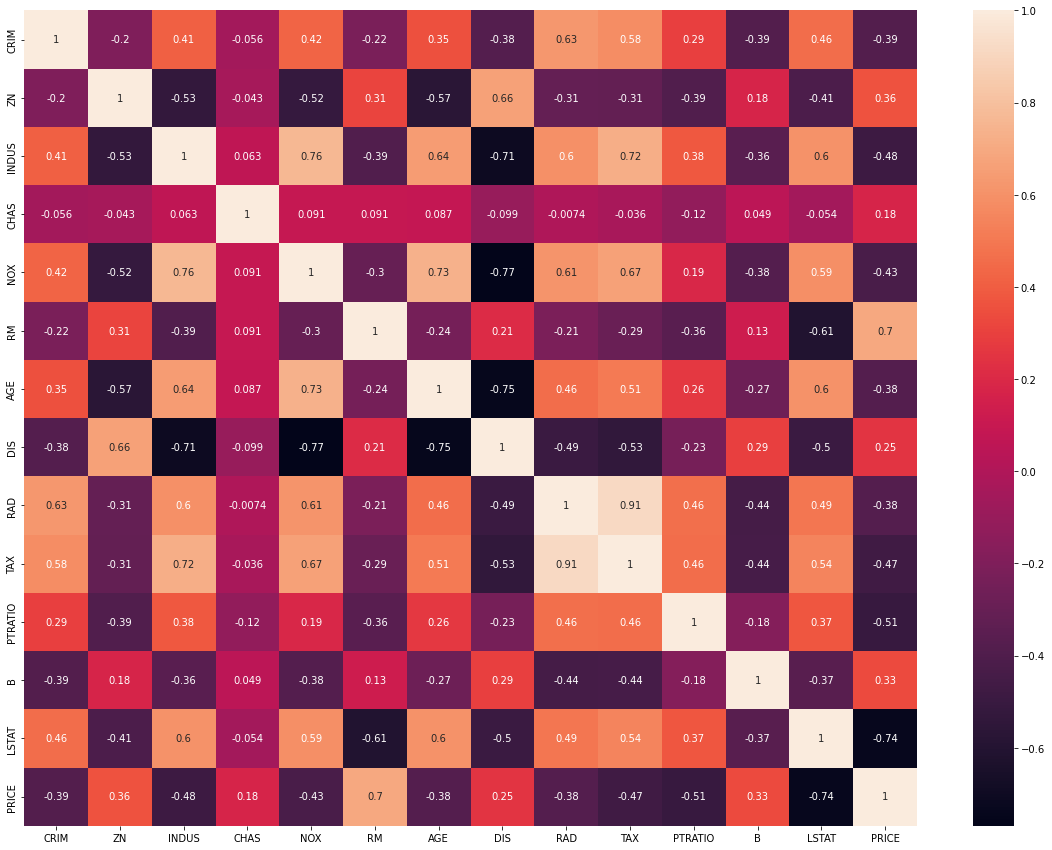

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

Erkenntnisgewinn: 
Da wir den Preis präzise vorhersagen möchten, interessieren uns vor allem die Variablen mit der stärksten negativen oder positiven Korrelation zum Preis.Direkt fällt auf, dass LSTAT eine sehr starke negative Korrelation zu PRICE hat während RM hat eine starke positive Korrelation zu PRICE. Außerdem wird klar, dass viele Variablen eine mittelstarke Korrelation mit der Preisvariable aufweisen. Somit wird interessant zu sehen sein, wie genau das Modell bei der Verwendung aller Variablen werden kann.

### Datenbereinigung und -transformation

In [9]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


Keine fehlenden Werte

In [10]:
df.drop_duplicates(inplace=True)
df.info() # Vergleich mit vorherigem data.info() un zu sehen, ob Values fehlen

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 59.3 KB


Keine Duplikate!

Datensatz verkleinern, um zu überprüfen, ob die zwei relevantesten Variablen bereits ausreichen, um zufriedenstellende Genauigkeit zu erreichen.

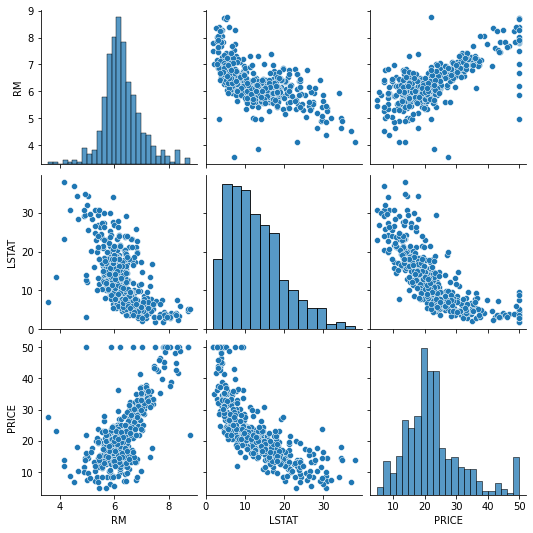

In [11]:
data = data.drop(data.columns[[0, 1, 2, 3, 4, 6,7,8,9,10,11]], axis=1)
sns.pairplot(data)

Variablen scheinen nahezu normalverteilt zu sein und wenig Ausreißer zu besitzen. 

### Datenaufbereitung

In [12]:
X = data.drop(columns='PRICE')
Y = data.PRICE

Data splitting

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

## Modell

### Modellauswahl

Da es sich um eine recht einfache Regressionsaufgabe handelt, ist der Einsatz eines linearen Modells zu empfehlen. Durch Ensemble-Methoden können daraufhin die Modelle noch genauer analysieren.

### Modellerstellung

Modelltraining mit Trainingsdaten

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_train)

Modelevaluation

In [15]:
from sklearn import metrics
from math import sqrt
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6413388879429032
Adjusted R^2: 0.6395500544663092
MAE: 3.8720713055370157
MSE: 30.413211220863243
RMSE: 5.51481742407337


Bestimmtheitsmaß R^2 (genauer adjusted R^2) beschreibt die Anpassungsgüte der Regression und dient für uns hier als Kennzahl für die "Genauigkeit" des Modells.

In [16]:
px.scatter(x=X_train['RM'], y=y_train, opacity=0.65, 
                trendline='ols', trendline_color_override='red')

ModuleNotFoundError: No module named 'statsmodels'

Regressionsgerade für RM (durchschnittliche Anzahl der Zimmer pro Wohnung)

In [17]:
px.scatter(x=X_train['LSTAT'], y=y_train, opacity=0.65, 
                trendline='ols', trendline_color_override='darkred')

Regressionsgerade für LSTAT (% niedrigerer Status der Bevölkerung)

<AxesSubplot:ylabel='PRICE'>

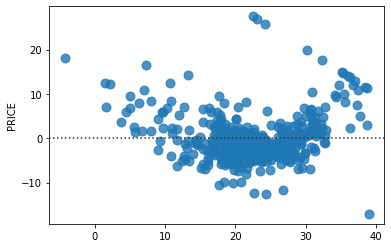

In [18]:
sns.residplot(x=y_pred, y=y_train, scatter_kws={"s": 80})

Residplot zeigt den Fehler zwischen einem vorhergesagten Wert und dem tatsächlichen Wert an. (Je näher an der Gerade auf 0, desto besser)

Modellevaluation mit Testdaten

In [19]:
y_pred = linreg.predict(X_test)

In [20]:
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.7042949097612246
Adjusted R^2: 0.702820071405919
MAE: 3.9158469369156133
MSE: 29.52448686381724
RMSE: 5.43364397654256


Erreichte Erfolgsmetrik von mindestens 66% erreicht.

In [21]:
px.scatter(x=X_test['RM'], y=y_test, opacity=0.65, 
                trendline='ols', trendline_color_override='darkred')

Regressionsgerade für RM (durchschnittliche Anzahl der Zimmer pro Wohnung)

In [22]:
px.scatter(x=X_test['LSTAT'], y=y_test, opacity=0.65, 
                trendline='ols', trendline_color_override='darkred')

Regressionsgerade für LSTAT (% niedrigerer Status der Bevölkerung)

<AxesSubplot:ylabel='PRICE'>

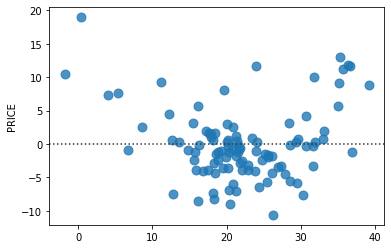

In [23]:
sns.residplot(x=y_pred, y=y_test, scatter_kws={"s": 80})

Weitaus weniger Punkte, da Testset wesentlich kleiner als Trainingset ist.

Modell mit allen Features/Variablen trainieren, um damit die Genauigkeit/Bestimmtheitsmaß zu erhöhen

In [24]:
X= df.drop(columns='PRICE')
Y= df.PRICE

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

Modelltraining mit Trainingsdaten

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_train)


In [27]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.733534043238552
Adjusted R^2: 0.7246518446798371
MAE: 3.263526055083248
MSE: 21.65548181513059
RMSE: 4.653545080380181


Weitaus bessere Metriken erreicht. Circa 0.11 höherer Adjusted R^2 Wert.

<AxesSubplot:ylabel='PRICE'>

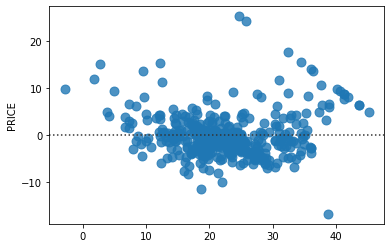

In [28]:
sns.residplot(x=y_pred, y=y_train, scatter_kws={"s": 80})

Im Residplot spiegelt sich die Verbesserung des Modells auch wider.

### Modellevaluation

Modellevaluation mit Testdaten

In [29]:
y_pred = linreg.predict(X_test)


In [30]:
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.7509292938298867
Adjusted R^2: 0.7426269369575496
MAE: 3.388791435953224
MSE: 24.127041685350477
RMSE: 4.911928509796379


Auch bei der Anwendung auf Testdaten höherer Adjusted R^2 Wert erreicht.

<AxesSubplot:ylabel='PRICE'>

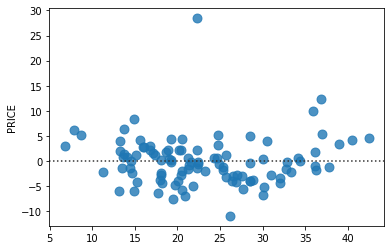

In [31]:
sns.residplot(x=y_pred, y=y_test, scatter_kws={"s": 80})

Residplot wirkt bis auf einen Ausreißer sehr zufriedenstellend.

Weiteres Regressionsmodell zum Vergleichen

Mit Hilfe von Machine Learning Ansätzen kann das Modell noch weiter verbessert werden. Hierzu wird aus dem Bereich der ensemble Methods (Bagging) der Random Forest Regressor verwendet.

In [33]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators=50)
# n_estimators gibt die Menge an Bäumen an
forest_regressor.fit(X_train, y_train)
y_pred_forest = forest_regressor.predict(X_test)

In [34]:
print('R^2:',metrics.r2_score(y_test, y_pred_forest))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred_forest))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_forest))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_forest))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest)))

R^2: 0.8827183949073305
Adjusted R^2: 0.8788090080709082
MAE: 2.333509803921569
MSE: 11.36086301960784
RMSE: 3.370587933819238


Hier wird ein weitaus höherer Adjusted R^2 Wert und ein weitaus geringerer RMSE Wert erreicht. Dieses Modell ist um einiges besser geeignet.

<AxesSubplot:ylabel='PRICE'>

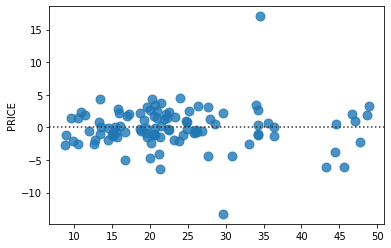

In [35]:
sns.residplot(x=y_pred_forest, y=y_test, scatter_kws={"s": 80})

Sehr geringe Fehler/Abweichung!

### Interpretation

Die definierten Erfolgsmetriken wurden bereits mit dem Linear Regression Modell erreicht. Bei der Anwendung auf Testdaten ist die Genauigkeit des Modells mit allen Variablen bereits um einiges höher als das Modell mit nur den relevantesten Variablen. Im Vergleich zur Linearen Regression ist die Preisvorhersage mit dem Random Forest Regressor am effektivsten/genauesten. Mit einem Bestimmtheitsmaß von 0.88 kann das Modell 88% der Streuung der Daten "erklären". Dies ist ein sehr gutes Ergebnis wenn man bedenkt, wie enorm hilfreich ein solches Modell sein kann. Wenn solch ein gutes Ergebnis bereits bei (meist) wenig korrelierenden Daten zu Stande kommt, können durch den Einsatz von noch mehr und präziseren Daten eventuell bald Immobilienmarktexperten obsolet für das Unternehmen werden. Außerdem hat das Dataset ein ethisches Problem durch die Niederstellung von Immobilien an Standorten mit einem hohen Anteil an schwarzer Bevölkerung. Solch eine Auffassung ist nicht mehr zeitgemäß und spielt hoffentlich in der Realität keine Rolle mehr. Stattdessen sollten mehr Faktoren zur Preisermittlung einbezogen werden wie die Grundstücksfläche, Lärmbelästigung oder Nähe zu Schulen und Kindertagesstätten. Solche reellen Faktoren können die Preisvorhersage noch weiter optimieren und damit das Unternehmen bei der Entscheidungsfindung noch besser unterstützen. Ein solch komplexes Thema wie die Ermittlung vom Wert einer Immobilie ist jedoch nicht mit der Analyse von Daten erledigt, sondern bedarf auch weiterhin Strategie und Marktanalysen, welche wiederum neue Daten liefern könnten, die das Modell noch weiter optimieren können.